# **Gym's churn rate research**

## Describing project

In this project I will research the churn rate of customers of a gym chain.

The data is compiled from a log of information about the gym customers for a period of a month. It contains their properties, visits and purchases, and their membership status at the end of the month.

The end goal is to advise the gym chain on how to work with the customers to decrease the churn rate.

The main steps of the project will be:
- Loading the data.
- Preparing the data for analysis by discovering and treating issues.
- Exploring the data to learn its contents.
- Building a model to predict user churn.
- Creating user clusters.
- Drawing conclusions and formulating recommendations regarding the strategy for customer interaction and retention.

# Importing modules

In [ ]:
# Importing the required modules
# Mathematical modules
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# Extending the shown fields of the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

# Loading data

In [ ]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported:
# 1 - A local runtime.
# 2 - A hosted runtime on Yandex Jupyterhub.
# 3 - A hosted runtime on Google colaboratory.
runtime_type = 2

# To connect to a local runtime use the command:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

# Setting file paths
file_path_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Notebooks - Yandex Practicum/'
file_path_yandex = '/datasets/'
file_path_google_colab = '/content/drive/My Drive/Colab Notebooks/Notebooks - Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    file_path = file_path_local

elif runtime_type == 2:
    print('A hosted runtime on Yandex Jupyterhub was chosen.\n')
    file_path = file_path_yandex
    
elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    file_path = file_path_google_colab

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either 1, 2 or 3.')

A local runtime was chosen.



In [ ]:
# Loading the data
data_gym = pd.read_csv(file_path + 'gym_churn_us.csv')

In [ ]:
# Exploring the general information
print('Printing the general information for data_gym:\n')
data_gym.info(memory_usage='deep')
print()

print('Printing some of the first rows:\n')
display(data_gym.head(10))

Printing the general information for data_gym:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_clas

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


# Preparing data

## Treating missing values

In [ ]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column in data_gym are:\n')
print(100 * data_gym.isna().sum() / len(data_gym))

The percentages of missing values per column in data_gym are:

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64


## Treating duplicates

In [ ]:
# Looking for duplicated rows
num_rows = len(data_gym)
num_duplicated = data_gym.duplicated().sum()

print('The total number of rows in data_gym is {}.\n'.format(num_rows))
print('The total number of duplicated rows in data_gym is {} ({:.2f}%).\n'
      .format(num_duplicated, 100*num_duplicated/num_rows))

The total number of rows in data_gym is 4000.

The total number of duplicated rows in data_gym is 0 (0.00%).



## Treating data types

In [ ]:
# Presenting the data types of the different variables
print('The data types in data_gym are:\n')
print(data_gym.info())

The data types in data_gym are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_tot

## Conclusions

- The data didn't contain missing values.
- The data didn't contain duplicated rows.
- The data types of the various columns weren't changed. All of the variables can be described by quantitative values and are indeed integers of real numbers.

# Exploring data

## Exploring overall data

In [ ]:
# Exploring the overall data
for column_name in data_gym.columns:
    print(f'Describing the "{column_name}" column:\n', data_gym[column_name].describe())
    print()

Describing the "gender" column:
 count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

Describing the "Near_Location" column:
 count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Near_Location, dtype: float64

Describing the "Partner" column:
 count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64

Describing the "Promo_friends" column:
 count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo_friends, dtype: float64

Describing the "Phone" column:
 count    4000.

## Exploring data grouped by churn

In [ ]:
# Exploring data grouped by churn
data_gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


There are noticable differences between the means of the following variables for the customers that left versus those who remained:
- Near_Location - Customers who didn't leave usually live closer to the gyms than those who left, which can make it easier to continue training.
- Partner - Customers who didn't leave usually belong to a partner company relative to those who left, which can help encourage you to keep training by getting discounts.
- Promo_friends - Customers who didn't leave usually joined by a friend's promo code relative to those who left, and discounts can make it more probable than a customer will continue training. Also, if the friend is training with you, it can help you continue training by making you feel more committed and making the training more fun socially.
- Contract_period - Customers who didn't leave usually have a longer contract period relative to those who left, and perhaps customers that sign up to longer contracts feel committed or are sure they'll stay longer.
- Group_visits - Customers who didn't leave usually take part in group sessions more than those who left, which can help you continue training by making you feel more committed and making the tranining more fun socially.
- Age - Customers who didn't leave are older on average than those who left, perhaps since younger customers are less accustomed to training, or have more commitments in their life.
- Avg_additional_charges_total - Customers who didn't leave usually spend more on additional services than those who left, which perhaps makes their overall experince better.
- Month_to_end_contract - Customers who didn't leave usually have more remaining months until the end of the contract than those who left, so perhaps they're still excited from the beginning of their regimen, or not worn out or even injured yet, or feel committed due to paying for a long contract.
- Lifetime - Customers who didn't leave usually went to the gym for a longer period than those who left, so perhaps they created a habit and overcome the harder beginning.
- Avg_class_frequency_total - Customers who didn't leave usually train more often than those who left, so perhaps they're more committed, or have created a habit or overcome the harder beginning.
- Avg_class_frequency_current_month - Customers who didn't leave trained more often in the last month than those who left, so perhaps they're more committed, or have created a habit or overcome the harder beginning.

## Plotting distributions

In [ ]:
# Creating useful variables
group_stayed = data_gym.query('Churn == 0')
group_left = data_gym.query('Churn == 1')

groups = [group_stayed, group_left]
groups_names = ['Staying customers', 'Leaving customers']

print('There are {} customers in the group of customers who stayed versus {} in the group of those who left.'
      .format(len(group_stayed), len( group_left)))
print('Therefore, {:.2%} of the customers left.'.format(len(group_left) / len(data_gym)))

There are 2939 customers in the group of customers who stayed versus 1061 in the group of those who left.
Therefore, 26.52% of the customers left.


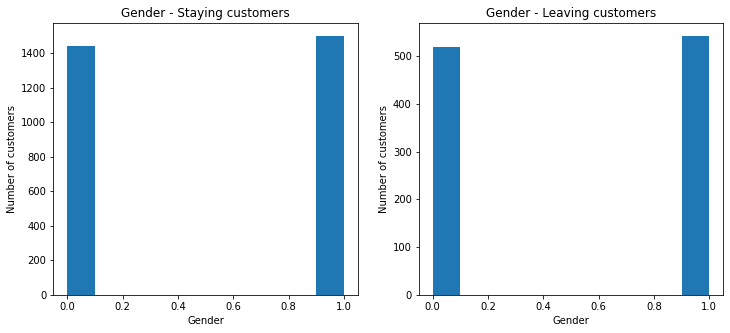

In [ ]:
# Plotting the 'gender' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['gender'])
    axes[i].set_title(f'Gender - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Gender')
plt.show()

The ratios of the numbers of males to females are similar between the two groups.

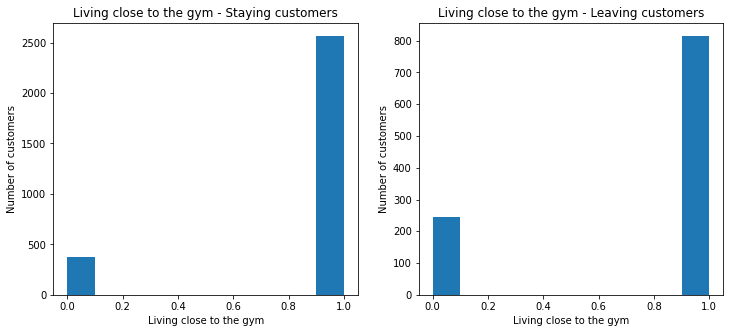

In [ ]:
# Plotting the 'Near_Location' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Near_Location'])
    axes[i].set_title(f'Living close to the gym - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Living close to the gym')
plt.show()

Customers who didn't leave usually live closer to the gym than those who left.

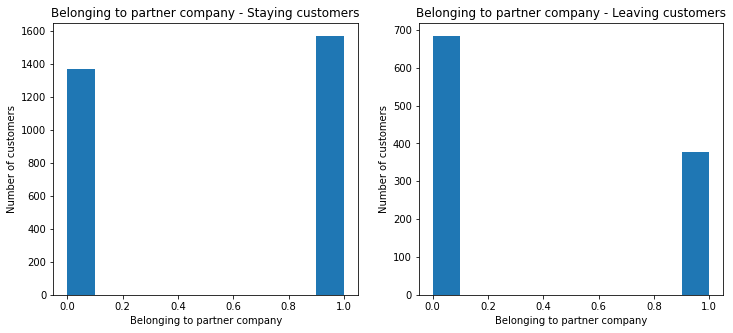

In [ ]:
# Plotting the 'Partner' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Partner'])
    axes[i].set_title(f'Belonging to partner company - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Belonging to partner company')
plt.show()

Customers who didn't leave usually belong to a partner company relative to those who left.

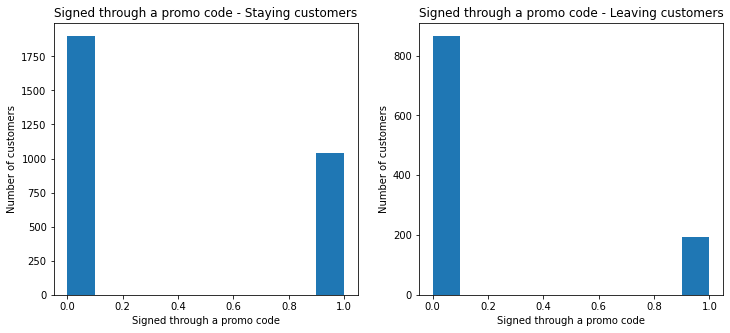

In [ ]:
# Plotting the 'Promo_friends' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Promo_friends'])
    axes[i].set_title(f'Signed through a promo code - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Signed through a promo code')
plt.show()

Customers who didn't leave usually signed through a promo code relative to those who left.

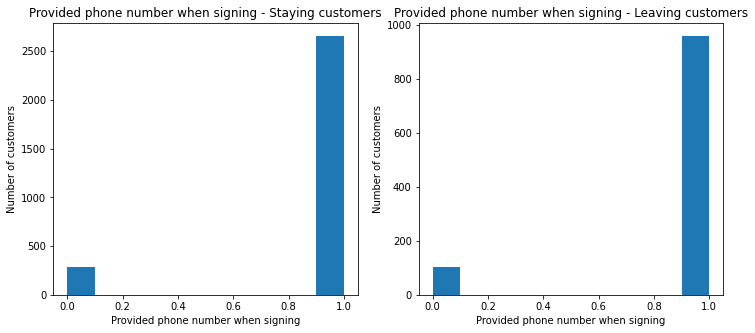

In [ ]:
# Plotting the 'Phone' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Phone'])
    axes[i].set_title(f'Provided phone number when signing - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Provided phone number when signing')
plt.show()

The ratios of customers who provided their phone number when signing to those who didn't is similar between the two groups.

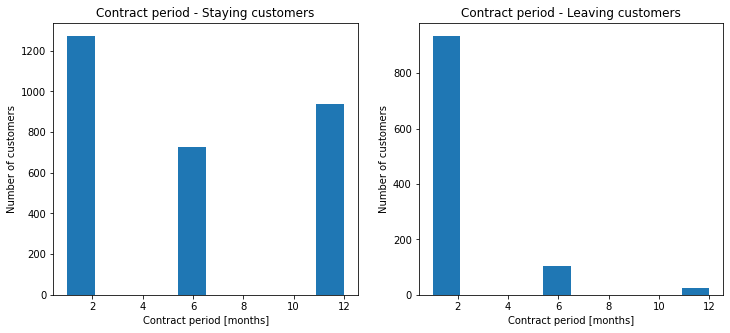

In [ ]:
# Plotting the 'Contract_period' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Contract_period'])
    axes[i].set_title(f'Contract period - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Contract period [months]')
plt.show()

Customers who didn't leave usually signed up to longer contract periods relative to those who left.

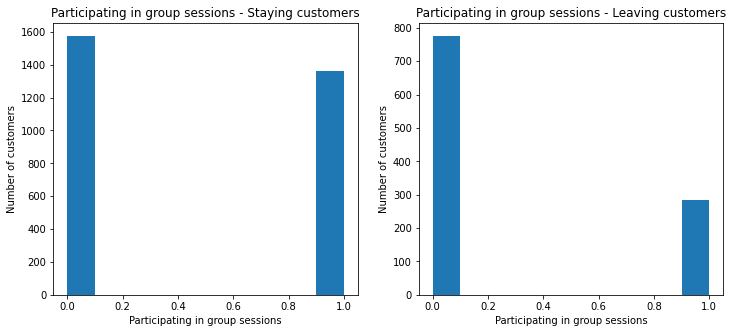

In [ ]:
# Plotting the 'Group_visits' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Group_visits'])
    axes[i].set_title(f'Participating in group sessions - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Participating in group sessions')
plt.show()

Customers who didn't leave usually participated more in group sessions relative to those who left.

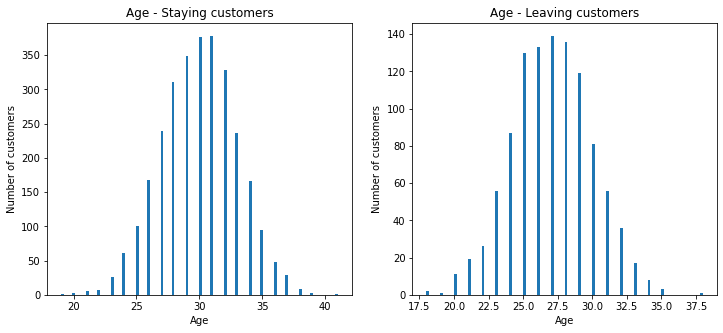

In [ ]:
# Plotting the 'Age' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Age'], bins=100)
    axes[i].set_title(f'Age - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Age')
plt.show()

Customers who didn't leave have a higher average age relative to those who left. The shapes of the distributions are similar, they aren't very skewed to any particular side, and have no significant outliers.

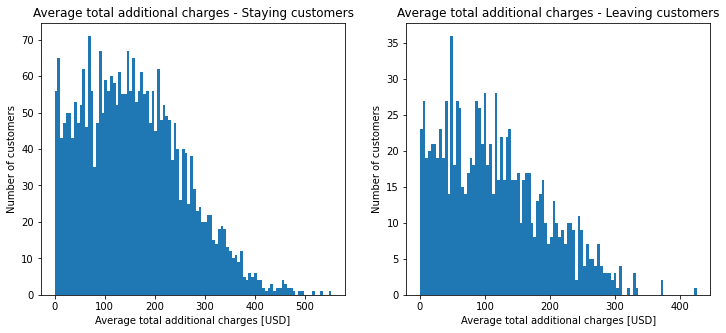

In [ ]:
# Plotting the 'Avg_additional_charges_total' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Avg_additional_charges_total'], bins=100)
    axes[i].set_title(f'Average total additional charges - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Average total additional charges [USD]')
plt.show()

Customers who didn't leave have higher average total additional charges relative to those who left. The shapes of the distributions are similar, they are positively skewed with a peak at the low values, and have outliers that reach hundreds of USD.

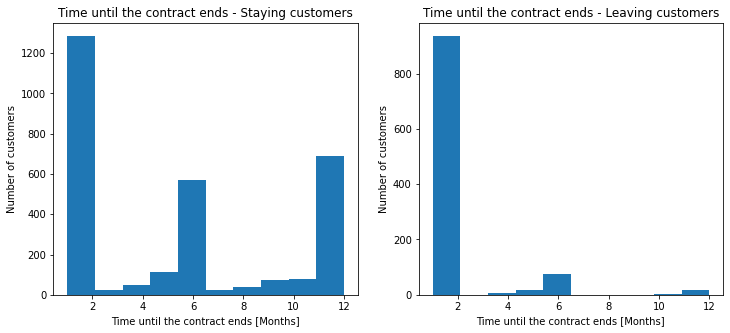

In [ ]:
# Plotting the 'Month_to_end_contract' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Month_to_end_contract'])
    axes[i].set_title(f'Time until the contract ends - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Time until the contract ends [Months]')
plt.show()

Customers who didn't leave have higher average times until the contract ends relative to those who left. The distributions are peaked at a single month.

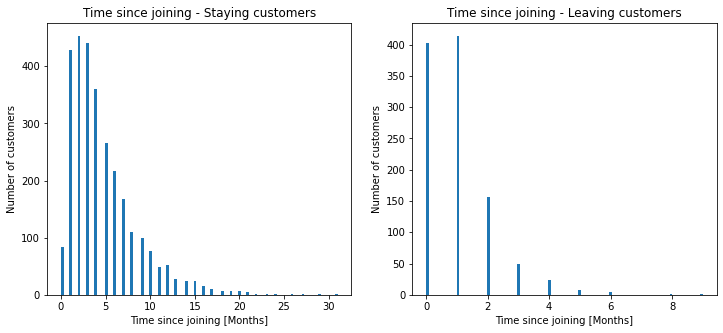

In [ ]:
# Plotting the 'Lifetime' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Lifetime'], bins=100)
    axes[i].set_title(f'Time since joining - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Time since joining [Months]')
plt.show()

Customers who didn't leave have higher average time since joining relative to those who left. The shapes of the distributions are similar, they are positively skewed with a peak at the low values, and have outliers that reach tens of months and nine months for the staying and leaving customers, respectively.

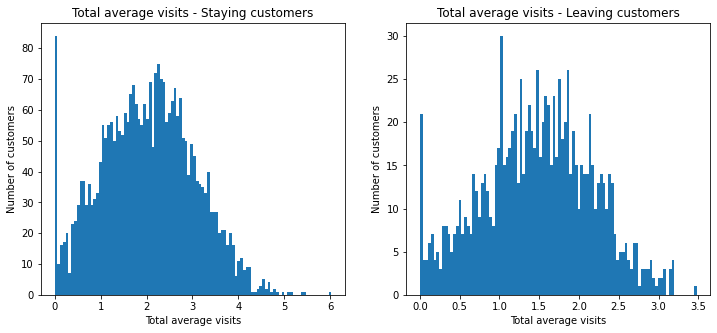

In [ ]:
# Plotting the 'Avg_class_frequency_total' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Avg_class_frequency_total'], bins=100)
    axes[i].set_title(f'Total average visits - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Total average visits')
plt.show()

Customers who didn't leave have a higher average total amount of visits relative to those who left. The shapes of the distributions are similar, they aren't very skewed to any particular side, and have no significant outliers. There are also peakes at 0 visits, representing new customers.

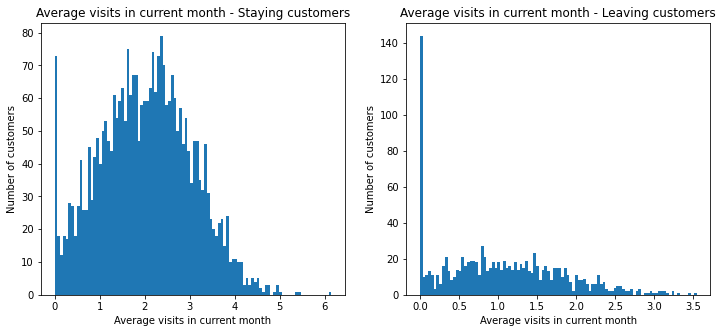

In [ ]:
# Plotting the 'Avg_class_frequency_current_month' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in [0,1]:
    axes[i].hist(groups[i]['Avg_class_frequency_current_month'], bins=100)
    axes[i].set_title(f'Average visits in current month - {groups_names[i]}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Average visits in current month')
plt.show()

Customers who didn't leave have a higher average amount of visits in the past month relative to those who left. The shapes of the distributions are similar, they aren't very skewed to any particular side, and have no significant outliers. There are also peakes at 0 visits, representing new customers.

## Plotting correlation matrix

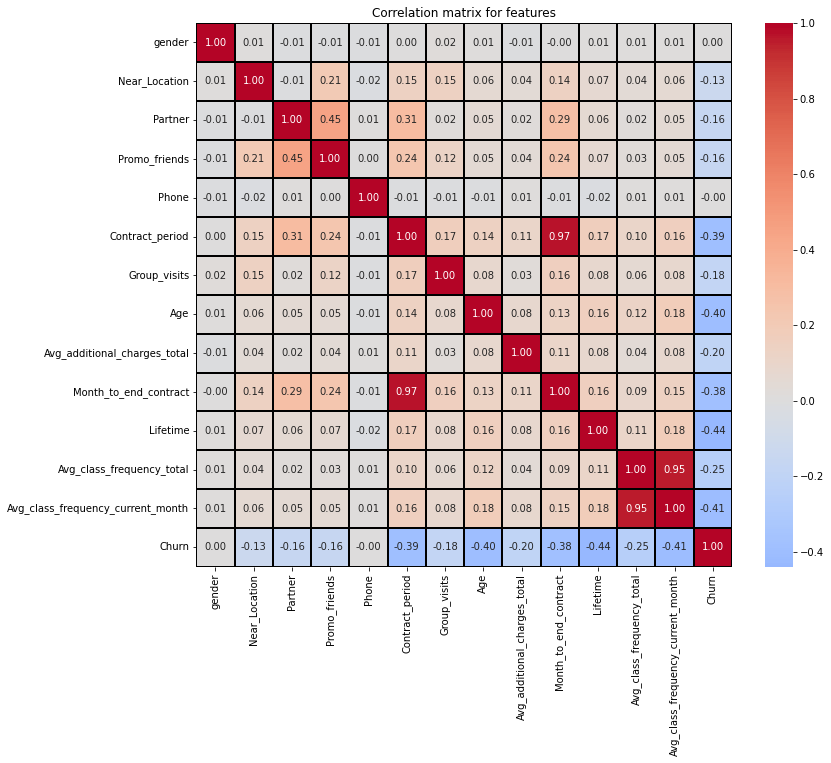

In [ ]:
# Calculating the correlation matrix for the features
corr_matrix = data_gym.corr()
corr_matrix = round(corr_matrix, 2)

# Plotting heatmap
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',
            linewidths=1, linecolor='black', cmap='coolwarm', center=0)
plt.title('Correlation matrix for features')
plt.show()

We see a very strong correlation between the number of months left until the end of the contract and the duration of the contract, which makes sense since the longer the contract, the more months will be left.

There's also some correlation between belonging to a partner company and using a friend's promo code, which can be explained by customers in partner companies being more likely to invite their coworkers.

There's some negative correlation between churn and:
- The contract's period - Perhaps customers that sign up to longer contracts are feeling committed or being sure they'll stay longer.  
- Age - Perhaps younger customers are less accustomed to training, or have more commitments in life, which causes them to leave earlier.
- Months until the end of the contract - Perhaps customers are still feeling motivated at the beginning of their contract, and therefore aren't leaving yet.
- Lifetime - Perhaps customers that have succeeded in training for a long period have created a habit and overcome the harder beginning.
- The average frequency of visits per week over the preceding month - Perhaps customers that train more frequently find training easier or are more committed to the regimen.

# Predicting churn

## Preparing data

In [ ]:
# Dividing the data into features (X) and a target (y)
X = data_gym.drop(['Churn'], axis=1)
y = data_gym['Churn']

# Dividing the data into training and validation data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the training set
scaler = StandardScaler()
# Training the scaler on the train set and transforming it
X_train_standardized = scaler.fit_transform(X_train)
# Transforming the test set
X_test_standardized = scaler.transform(X_test)

## Training & evaluating models

In [ ]:
# Defining models to check
models = [LogisticRegression(random_state=0, max_iter=1000), # Increasing the maximum iteration to allow convergence
          RandomForestClassifier(random_state=0)]
models_names = ['logistic regression',
                'random forest']

# Defining a function for training and evaluating models
def make_prediction(model, model_name, X_train, y_train, X_test, y_test):
    """ Taking the model and the data as input and outputing metrics. """
    # Training models
    model.fit(X_train, y_train)
    # Predicting
    y_pred = model.predict(X_test)
    # Evaluating accuracy, precision, and recall for both models using the validation set
    print('The metrics for the "{}" model are:\nAccuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}.\n'
         .format(model_name,
                 accuracy_score(y_test, y_pred),
                 precision_score(y_test, y_pred),
                 recall_score(y_test, y_pred)))
    return

# Calculating metrics
for i in range(0,len(models)):
    make_prediction(models[i], models_names[i], X_train, y_train, X_test, y_test)

The metrics for the "logistic regression" model are:
Accuracy: 0.92, precision: 0.86, recall: 0.83.

The metrics for the "random forest" model are:
Accuracy: 0.92, precision: 0.84, recall: 0.82.



When comparing the performance of the models, we see that the resulting metrics for the logistic regression model are better than those of the random forest model, but they're only slightly better.

# Clustering users

## Preparing data

In [ ]:
# Removing the target
X_clustering = data_gym.drop(['Churn'], axis=1)

# Standardizing the data
scaler = StandardScaler()

# Training the scaler on the data and transforming it
X_clustering_standardized = scaler.fit_transform(X_clustering)

## Agglomerative hierarchical clustering

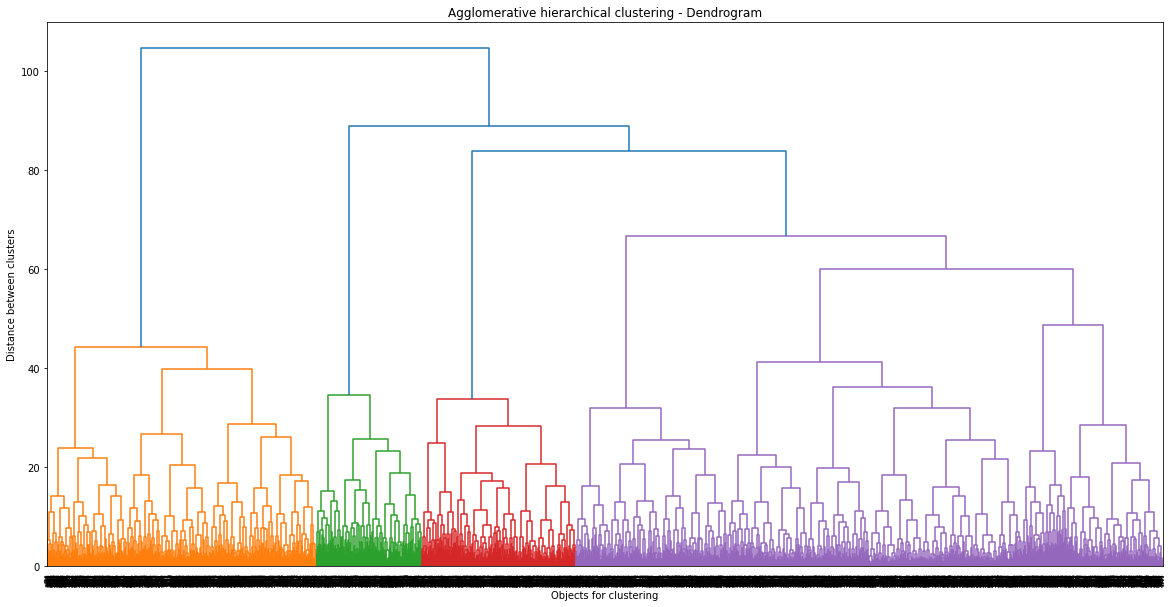

In [ ]:
# Calculating a matrix of distances based on the standardized feature matrix
linked = linkage(X_clustering_standardized, method = 'ward')

# Presenting a dendrogram of the clustering
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.title('Agglomerative hierarchical clustering - Dendrogram')
plt.ylabel('Distance between clusters')
plt.xlabel('Objects for clustering')
plt.show()

Based on the dendrogram we can single out 4 clusters. Other reasonable options could be 5 or 6 clusters.

## K-means clustering

In [ ]:
# Setting the number of clusters for the K-means model
number_of_clusters = 5

# Training the model
model = KMeans(n_clusters = number_of_clusters, random_state = 0)

# Predicting customer clusters, by applying the model to the data to form a cluster vector
clusters = model.fit_predict(X_clustering_standardized)

In [ ]:
# Adding the clusters to the data
data_gym['Cluster'] = clusters

# Looking at the mean feature values for the clusters
data_gym.groupby(['Cluster']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


The customers of the clusters have the following properties on average which make them unique:

- Cluster 0 customers: Didn't provide their phone when signing up.

- Cluster 1 customers: Don't belong to partner companies, almost didn't use promo codes when signing up, provided their phone when signing up, have the shortest contract periods, are the youngest, have the least months until the end of the contract, have the shortest lifetimes, have the lowest average total visits frequency, have the lowest average visits frequency in the current month, have the highest churn.

- Cluster 2 customers: Provided their phone when signing up, have the longest lifetimes, have the highest average total visits frequency, have the highest average visits frequency in the current month, almost all of them stayed.

- Cluster 3 customers: Live relatively the furthest from the gym, belong to partner companies, provided their phone when signing up, have the least visits in group sessions, are the oldest, have the least additional charges.

- Cluster 4 customers: Live near the gym, used promo codes the most when signing up, provided their phone when signing up, have the longest contract periods, have the most visits in group sessions, have the most months until the end of the contract, almost all of them stayed.

## Clusters' distributions

In [ ]:
# Creating useful variables
clusters_data = []
for i in list(range(0,number_of_clusters)):
    clusters_data.append(data_gym.query('Cluster == @i'))
    print('There are {} customers in cluster {}.'.format(len(clusters_data[i]), i))

There are 1010 customers in cluster 0.
There are 385 customers in cluster 1.
There are 505 customers in cluster 2.
There are 1262 customers in cluster 3.
There are 838 customers in cluster 4.


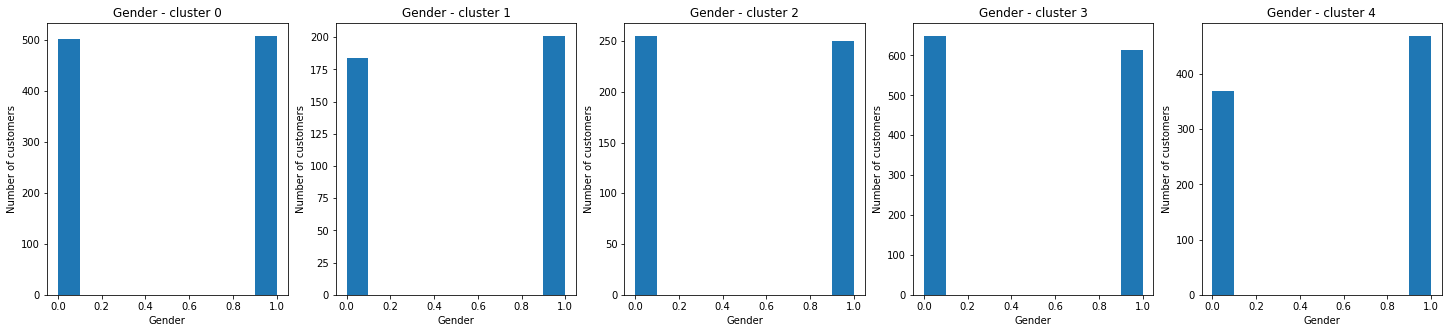

In [ ]:
# Plotting the 'gender' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['gender'])
    axes[i].set_title(f'Gender - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Gender')
plt.show()

The ratios of the numbers of males to females are similar between the clusters.

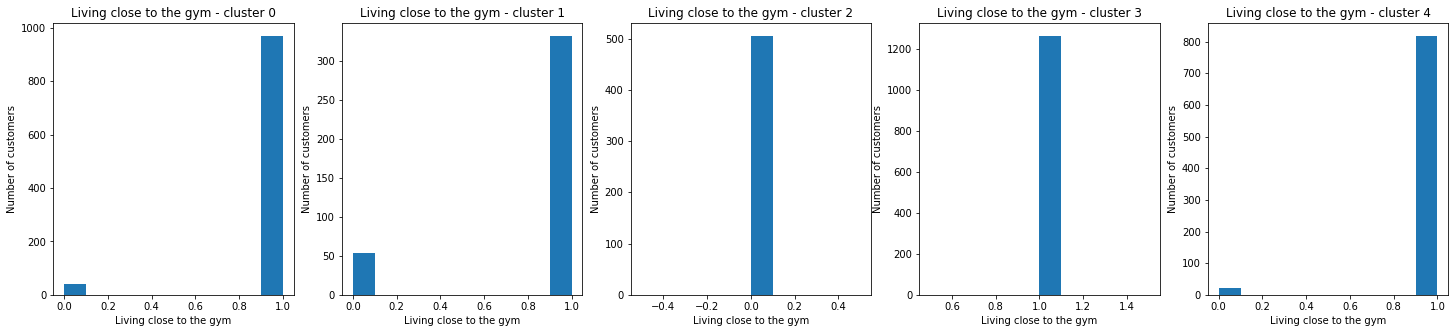

In [ ]:
# Plotting the 'Near_Location' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Near_Location'])
    axes[i].set_title(f'Living close to the gym - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Living close to the gym')
plt.show()

Almost everyone in cluster 4 lives near the gym.

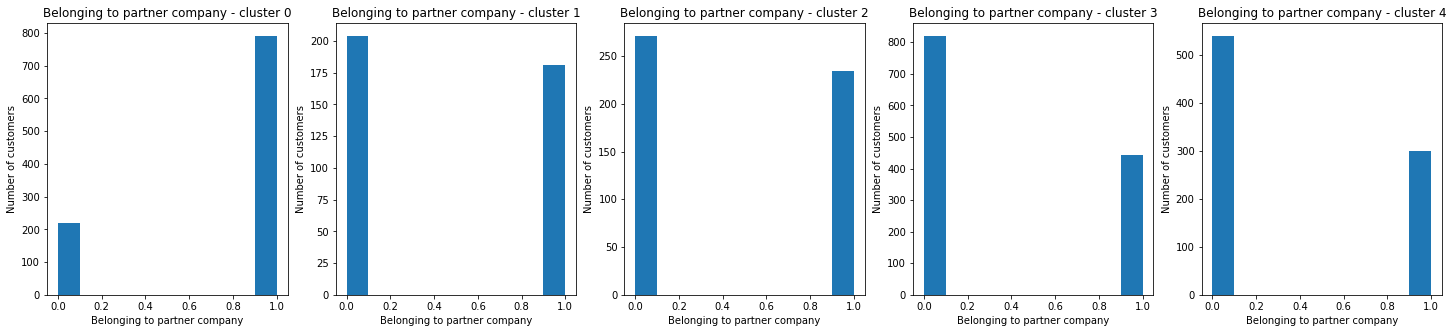

In [ ]:
# Plotting the 'Partner' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Partner'])
    axes[i].set_title(f'Belonging to partner company - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Belonging to partner company')
plt.show()

Nonbody in cluster 1 belongs to a partner company, while everyone in cluster 3 does.

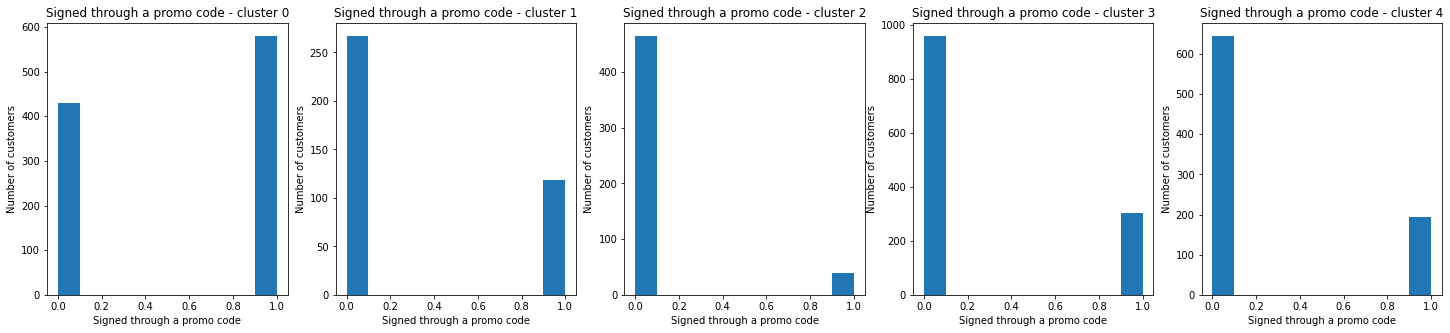

In [ ]:
# Plotting the 'Promo_friends' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Promo_friends'])
    axes[i].set_title(f'Signed through a promo code - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Signed through a promo code')
plt.show()

Almost nobody in cluster 1 signed up via a promo code. Only cluster 4 has more customers who signed via a promo code than those who didn't.

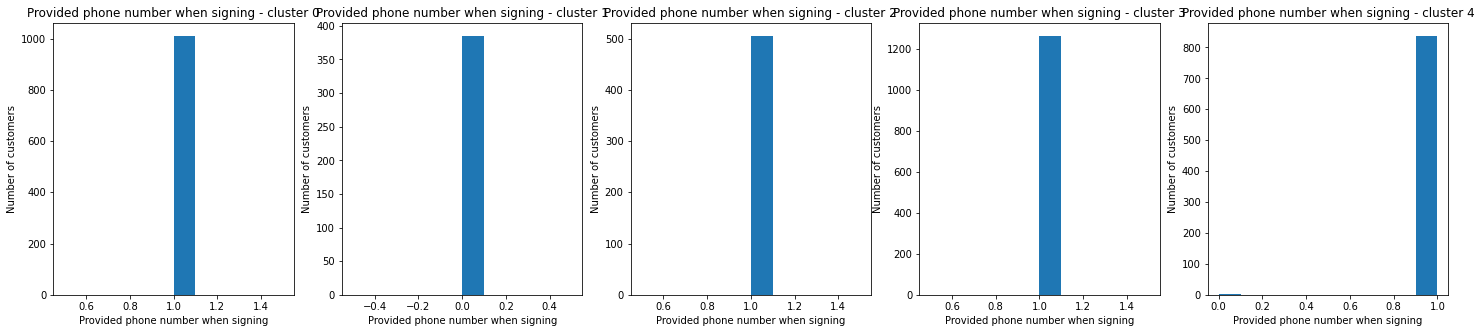

In [ ]:
# Plotting the 'Phone' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Phone'])
    axes[i].set_title(f'Provided phone number when signing - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Provided phone number when signing')
plt.show()

Approximately of the customers in clusters 1, 2, 3 and 4 have provided their phone number when signing, while nobody in cluster 0 did so.

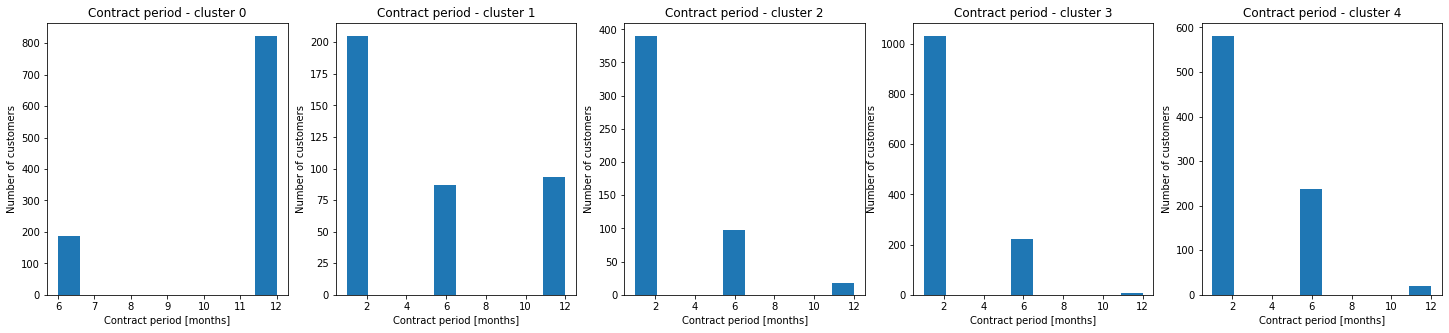

In [ ]:
# Plotting the 'Contract_period' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Contract_period'])
    axes[i].set_title(f'Contract period - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Contract period [months]')
plt.show()

Customers in cluster 4 have usually signed up to longer contract periods relative to the customers of the other clusters.

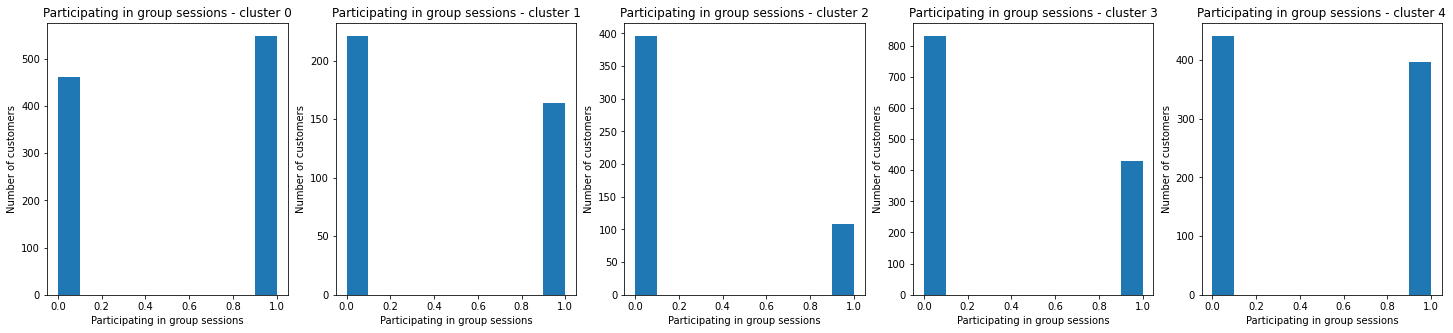

In [ ]:
# Plotting the 'Group_visits' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Group_visits'])
    axes[i].set_title(f'Participating in group sessions - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Participating in group sessions')
plt.show()

Only cluster 4 has more customers who participated in group sessions than those who didn't.

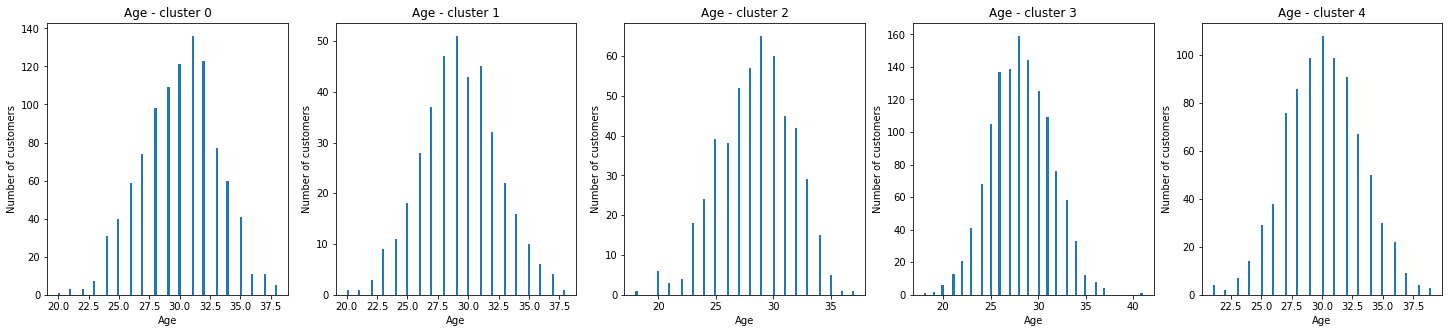

In [ ]:
# Plotting the 'Age' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Age'], bins=100)
    axes[i].set_title(f'Age - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Age')
plt.show()

The differences between the ages of the customers in the different clusters are very tiny.

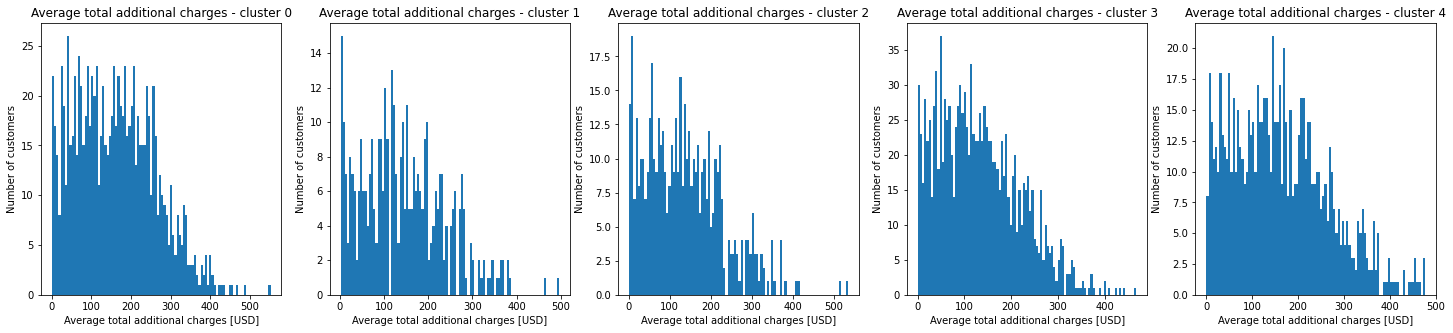

In [ ]:
# Plotting the 'Avg_additional_charges_total' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Avg_additional_charges_total'], bins=100)
    axes[i].set_title(f'Average total additional charges - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Average total additional charges [USD]')
plt.show()

The differences between the average total additional charges of the customers in the different clusters aren't significant.

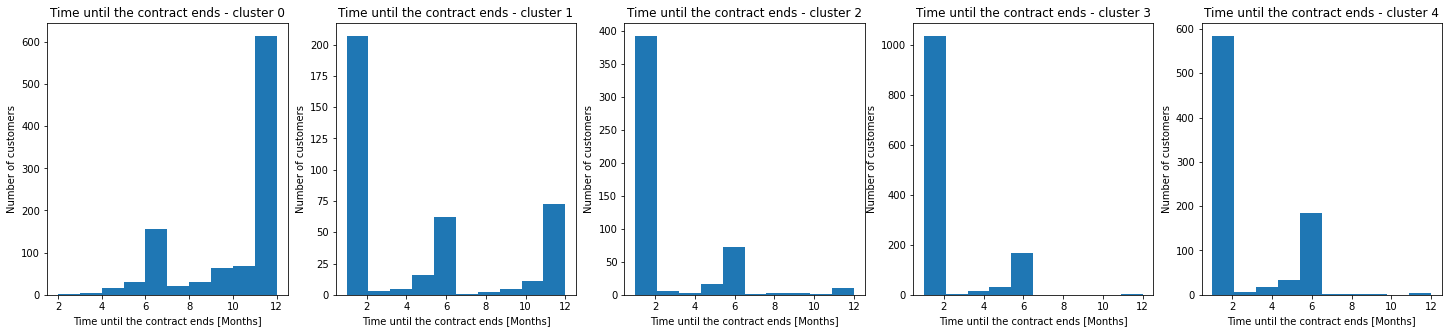

In [ ]:
# Plotting the 'Month_to_end_contract' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Month_to_end_contract'])
    axes[i].set_title(f'Time until the contract ends - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Time until the contract ends [Months]')
plt.show()

Customers in cluster 4 have the highest average times until their contract ends relative to the other clusters.

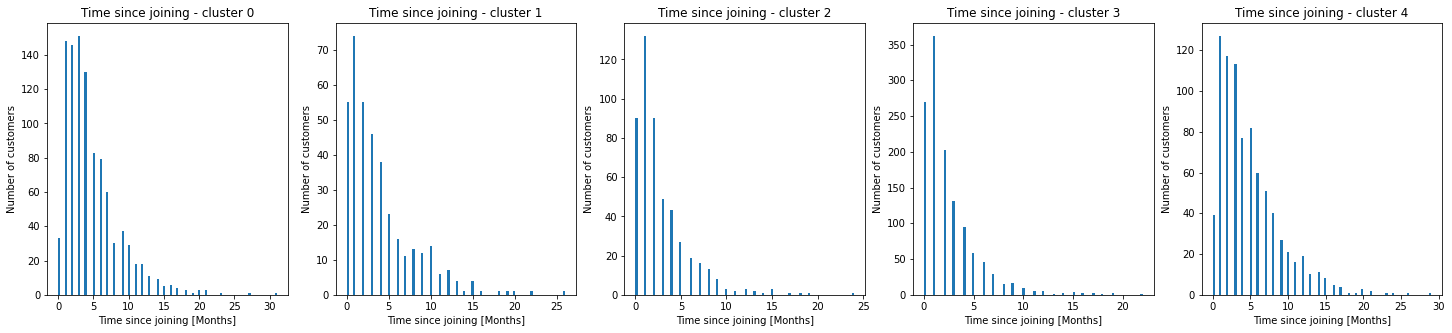

In [ ]:
# Plotting the 'Lifetime' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Lifetime'], bins=100)
    axes[i].set_title(f'Time since joining - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Time since joining [Months]')
plt.show()

It's not immediately obvious that there are significant differences between the time since joining in the different clusters, but cluster 2 has the highest average lifetime.

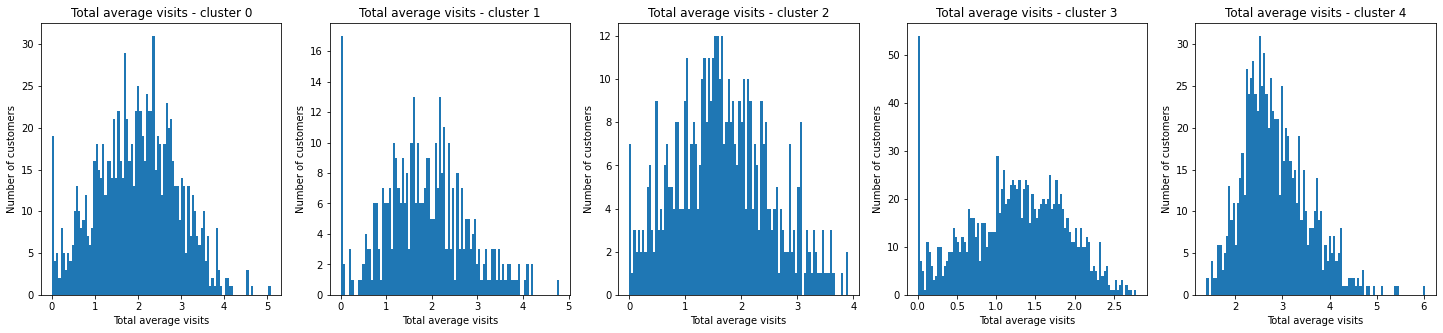

In [ ]:
# Plotting the 'Avg_class_frequency_total' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Avg_class_frequency_total'], bins=100)
    axes[i].set_title(f'Total average visits - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Total average visits')
plt.show()

Cluster 2 has the highest average total amount of visits relative to the other clusters. In addition, the other clusters have a peak at 0 visits, representing new customers, while clutser 2 doesn't.

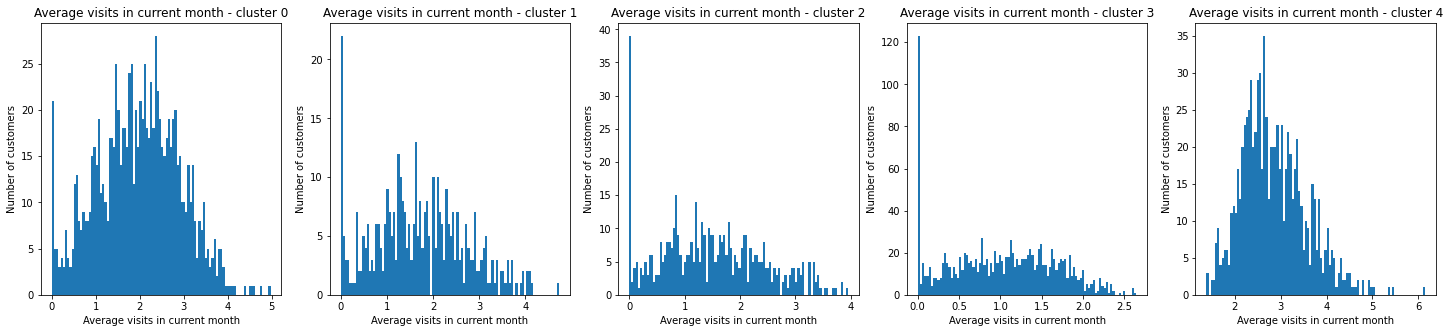

In [ ]:
# Plotting the 'Avg_class_frequency_current_month' variable
fig, axes = plt.subplots(nrows=1, ncols=number_of_clusters, figsize=(25,5))
for i in list(range(0,number_of_clusters)):
    axes[i].hist(clusters_data[i]['Avg_class_frequency_current_month'], bins=100)
    axes[i].set_title(f'Average visits in current month - cluster {i}')
    axes[i].set_ylabel('Number of customers')
    axes[i].set_xlabel('Average visits in current month')
plt.show()

Cluster 2 has the highest average amount of visits in the past month relative to the other clusters. In addition, the other clusters have a peak at 0 visits, representing new customers, while clutser 2 doesn't.

## Clusters' churn

In [ ]:
# Calculating the mean churn of the clusters
display(data_gym.groupby(['Cluster'])['Churn'].mean().to_frame().reset_index())

,Cluster,Churn
0,0,0.027723
1,1,0.267532
2,2,0.443564
3,3,0.514263
4,4,0.068019


We see that the clusters have different churn rates. The cluster that is prone to leaving is number 1, in which 55% of the customers left, and the loyal clusters are number 2 and 4, in which approximately all of the customers stayed.

# Conclusions & recommendations

Conclusions:

- The factors that impact churn most are (all of them have some negative correlation with the churn): The contract's period, age, months until the end of the contract, lifetime, the average frequency of visits per week over the preceding month.

- It's better to use a logistic regression model to predict churn than a random forest, but the difference between their performances is minor.

- The customers can be clustered into around 5 groups.

- The cluster of customers that are the most prone to leaving have the following properties: Don't belong to partner companies, almost didn't use promo codes when signing up, provided their phone when signing up, have the shortest contract periods, are the youngest, have the least months until the end of the contract, have the shortest lifetimes, have the lowest average total visits frequency, have the lowest average visits frequency in the current month.

- The first cluster of customers in which approximately everyone stayed have the following properties: Provided their phone when signing up, have the longest lifetimes, have the highest average total visits frequency, have the highest average visits frequency in the current month.

- The second cluster of customers in which approximately everyone stayed have the following properties: Live near the gym, used promo codes the most when signing up, provided their phone when signing up, have the longest contract periods, have the most visits in group sessions, have the most months until the end of the contract.

---

Recommendations, based on the factors that impact churn the most, the cluster of customers that are the most prone to leaving, and the cluster of customers that are the most prone to staying:

- Cause customers to sign up for longer contracts, for example by using discounts.

- Cause older customers to sign up, for example by targeting them when advertising, or by giving them discounts.

- Retain customers with long lifetimes, for example by giving them discounts or gifts when reaching certain lifetime durations.